In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
import tensorflow as tf
from keras.layers import LSTM, Dense,Input,Layer
from keras import backend as K,Model
from numpy.random import seed
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.metrics import roc_curve,roc_auc_score
seed(0)
tf.random.set_seed(0)

2023-02-19 09:24:08.896785: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data = pd.read_excel('brazilian credit card.xlsx')
selected_vars =['cep_cat numeric',
 'score_cat numeric',
 'velocidade_cat numeric',
 'bandeira_cat numeric',
 'qtde_parc_cat numeric',
 'valor_trans_cat numeric',
 'trans_nacional_cat numeric',
 'mcc_cat numeric',
 'valor_trans_ant_cat numeric',
 'mcc_ant_cat numeric',
 'dif_score_cat numeric',
 'cep_ant_cat numeric',
 'lim_cred_cat numeric',
 'Class']

In [3]:
tr_data = data[selected_vars]
tr_data.shape

(374823, 14)

In [4]:
X = tr_data.drop(['Class'], axis = 'columns')
Label_Data = tr_data['Class']

In [5]:
y=tr_data['Class']

In [6]:
from sklearn.preprocessing import StandardScaler
## Standardizing the data
X=pd.DataFrame(StandardScaler().fit_transform(X))

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, shuffle=False,random_state=0)
from sklearn.linear_model import SGDOneClassSVM
df1_normal=X_train[y_train==0]
clf = SGDOneClassSVM(nu=0.013,random_state=0)
res = clf.fit_predict(df1_normal)
res[res==1] = 0
res[res==-1] = 1
ros = RandomUnderSampler(sampling_strategy=0.95)
ros.fit_resample(df1_normal,res)
index=ros.sample_indices_
X_train.drop(X_train.index[index], inplace=True)
y_train.drop(y_train.index[index], inplace=True)


In [8]:
X_train.shape

(261913, 13)

In [9]:
X_test.shape

(112447, 13)

In [10]:
# X_train et X_test sont des dataframe qui contient les features
train_LSTM_X=X_train.to_numpy()
test_LSTM_X=X_test.to_numpy()

## Reshape input to be 3D [samples, timesteps, features] (format requis par LSTM)
train_LSTM_X = train_LSTM_X.reshape((train_LSTM_X.shape[0], 1, train_LSTM_X.shape[1]))
test_LSTM_X = test_LSTM_X.reshape((test_LSTM_X.shape[0], 1, test_LSTM_X.shape[1]))

## Recuperation des labels
train_LSTM_y=y_train
test_LSTM_y=y_test

In [11]:
inputs=Input((1,13))
x1=LSTM(50)(inputs)
outputs=Dense(1,activation='sigmoid')(x1)
model=Model(inputs,outputs)

2023-02-19 09:29:43.434145: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-19 09:29:43.434589: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [12]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['Precision','Recall'])

In [13]:
history=model.fit(train_LSTM_X, train_LSTM_y,epochs=500,batch_size=500)

Epoch 1/500
524/524 [==============================] - 25s 23ms/step - loss: 0.2201 - precision: 0.2111 - recall: 0.1055
Epoch 2/500
524/524 [==============================] - 9s 18ms/step - loss: 0.1157 - precision: 0.5391 - recall: 0.0966
Epoch 3/500
524/524 [==============================] - 10s 20ms/step - loss: 0.1115 - precision: 0.5767 - recall: 0.0970
Epoch 4/500
524/524 [==============================] - 10s 19ms/step - loss: 0.1085 - precision: 0.6034 - recall: 0.1031
Epoch 5/500
524/524 [==============================] - 10s 19ms/step - loss: 0.1060 - precision: 0.6310 - recall: 0.1305
Epoch 6/500
524/524 [==============================] - 10s 19ms/step - loss: 0.1039 - precision: 0.6337 - recall: 0.1510
Epoch 7/500
524/524 [==============================] - 10s 19ms/step - loss: 0.1023 - precision: 0.6346 - recall: 0.1615
Epoch 8/500
524/524 [==============================] - 10s 19ms/step - loss: 0.1007 - precision: 0.6507 - recall: 0.1825
Epoch 9/500
524/524 [============

524/524 [==============================] - 10s 19ms/step - loss: 0.0505 - precision: 0.8874 - recall: 0.6578
Epoch 69/500
524/524 [==============================] - 10s 19ms/step - loss: 0.0501 - precision: 0.8894 - recall: 0.6681
Epoch 70/500
524/524 [==============================] - 10s 19ms/step - loss: 0.0496 - precision: 0.8888 - recall: 0.6647
Epoch 71/500
524/524 [==============================] - 10s 19ms/step - loss: 0.0492 - precision: 0.8889 - recall: 0.6700
Epoch 72/500
524/524 [==============================] - 12s 22ms/step - loss: 0.0487 - precision: 0.8916 - recall: 0.6743
Epoch 73/500
524/524 [==============================] - 11s 21ms/step - loss: 0.0482 - precision: 0.8930 - recall: 0.6786
Epoch 74/500
524/524 [==============================] - 11s 21ms/step - loss: 0.0478 - precision: 0.8919 - recall: 0.6819
Epoch 75/500
524/524 [==============================] - 12s 22ms/step - loss: 0.0474 - precision: 0.8957 - recall: 0.6851
Epoch 76/500
524/524 [===============

524/524 [==============================] - 9s 18ms/step - loss: 0.0301 - precision: 0.9522 - recall: 0.8191
Epoch 136/500
524/524 [==============================] - 10s 20ms/step - loss: 0.0299 - precision: 0.9532 - recall: 0.8252
Epoch 137/500
524/524 [==============================] - 10s 19ms/step - loss: 0.0297 - precision: 0.9514 - recall: 0.8209
Epoch 138/500
524/524 [==============================] - 10s 19ms/step - loss: 0.0295 - precision: 0.9516 - recall: 0.8245
Epoch 139/500
524/524 [==============================] - 10s 19ms/step - loss: 0.0293 - precision: 0.9542 - recall: 0.8244
Epoch 140/500
524/524 [==============================] - 10s 19ms/step - loss: 0.0291 - precision: 0.9534 - recall: 0.8273
Epoch 141/500
524/524 [==============================] - 10s 19ms/step - loss: 0.0289 - precision: 0.9526 - recall: 0.8339
Epoch 142/500
524/524 [==============================] - 10s 19ms/step - loss: 0.0287 - precision: 0.9524 - recall: 0.8307
Epoch 143/500
524/524 [========

524/524 [==============================] - 10s 19ms/step - loss: 0.0196 - precision: 0.9731 - recall: 0.8934
Epoch 202/500
524/524 [==============================] - 10s 19ms/step - loss: 0.0195 - precision: 0.9727 - recall: 0.8948
Epoch 203/500
524/524 [==============================] - 9s 17ms/step - loss: 0.0194 - precision: 0.9743 - recall: 0.8961
Epoch 204/500
524/524 [==============================] - 10s 19ms/step - loss: 0.0192 - precision: 0.9737 - recall: 0.8951
Epoch 205/500
524/524 [==============================] - 10s 19ms/step - loss: 0.0191 - precision: 0.9749 - recall: 0.8967
Epoch 206/500
524/524 [==============================] - 10s 19ms/step - loss: 0.0190 - precision: 0.9753 - recall: 0.8959
Epoch 207/500
524/524 [==============================] - 10s 20ms/step - loss: 0.0189 - precision: 0.9758 - recall: 0.8954
Epoch 208/500
524/524 [==============================] - 10s 19ms/step - loss: 0.0188 - precision: 0.9748 - recall: 0.8989
Epoch 209/500
524/524 [========

524/524 [==============================] - 10s 20ms/step - loss: 0.0129 - precision: 0.9864 - recall: 0.9373
Epoch 268/500
524/524 [==============================] - 11s 20ms/step - loss: 0.0129 - precision: 0.9840 - recall: 0.9413
Epoch 269/500
524/524 [==============================] - 11s 21ms/step - loss: 0.0128 - precision: 0.9853 - recall: 0.9409
Epoch 270/500
524/524 [==============================] - 11s 21ms/step - loss: 0.0127 - precision: 0.9854 - recall: 0.9416
Epoch 271/500
524/524 [==============================] - 11s 22ms/step - loss: 0.0126 - precision: 0.9845 - recall: 0.9429
Epoch 272/500
524/524 [==============================] - 10s 20ms/step - loss: 0.0126 - precision: 0.9861 - recall: 0.9447
Epoch 273/500
524/524 [==============================] - 9s 17ms/step - loss: 0.0125 - precision: 0.9865 - recall: 0.9425
Epoch 274/500
524/524 [==============================] - 8s 15ms/step - loss: 0.0124 - precision: 0.9863 - recall: 0.9436
Epoch 275/500
524/524 [=========

524/524 [==============================] - 8s 16ms/step - loss: 0.0084 - precision: 0.9933 - recall: 0.9678
Epoch 335/500
524/524 [==============================] - 8s 16ms/step - loss: 0.0084 - precision: 0.9930 - recall: 0.9657
Epoch 336/500
524/524 [==============================] - 8s 16ms/step - loss: 0.0083 - precision: 0.9937 - recall: 0.9680
Epoch 337/500
524/524 [==============================] - 8s 16ms/step - loss: 0.0082 - precision: 0.9939 - recall: 0.9668
Epoch 338/500
524/524 [==============================] - 8s 16ms/step - loss: 0.0082 - precision: 0.9923 - recall: 0.9678
Epoch 339/500
524/524 [==============================] - 8s 16ms/step - loss: 0.0081 - precision: 0.9946 - recall: 0.9675
Epoch 340/500
524/524 [==============================] - 8s 16ms/step - loss: 0.0081 - precision: 0.9937 - recall: 0.9680
Epoch 341/500
524/524 [==============================] - 8s 16ms/step - loss: 0.0080 - precision: 0.9938 - recall: 0.9680
Epoch 342/500
524/524 [===============

524/524 [==============================] - 8s 15ms/step - loss: 0.0055 - precision: 0.9961 - recall: 0.9799
Epoch 402/500
524/524 [==============================] - 8s 15ms/step - loss: 0.0055 - precision: 0.9954 - recall: 0.9790
Epoch 403/500
524/524 [==============================] - 8s 16ms/step - loss: 0.0054 - precision: 0.9960 - recall: 0.9790
Epoch 404/500
524/524 [==============================] - 8s 16ms/step - loss: 0.0054 - precision: 0.9945 - recall: 0.9800
Epoch 405/500
524/524 [==============================] - 8s 15ms/step - loss: 0.0054 - precision: 0.9956 - recall: 0.9791
Epoch 406/500
524/524 [==============================] - 8s 15ms/step - loss: 0.0053 - precision: 0.9962 - recall: 0.9795
Epoch 407/500
524/524 [==============================] - 8s 15ms/step - loss: 0.0053 - precision: 0.9955 - recall: 0.9798
Epoch 408/500
524/524 [==============================] - 8s 16ms/step - loss: 0.0053 - precision: 0.9965 - recall: 0.9790
Epoch 409/500
524/524 [===============

524/524 [==============================] - 8s 15ms/step - loss: 0.0038 - precision: 0.9967 - recall: 0.9848
Epoch 469/500
524/524 [==============================] - 8s 15ms/step - loss: 0.0038 - precision: 0.9957 - recall: 0.9854
Epoch 470/500
524/524 [==============================] - 8s 16ms/step - loss: 0.0038 - precision: 0.9959 - recall: 0.9853
Epoch 471/500
524/524 [==============================] - 8s 15ms/step - loss: 0.0038 - precision: 0.9954 - recall: 0.9852
Epoch 472/500
524/524 [==============================] - 8s 16ms/step - loss: 0.0038 - precision: 0.9961 - recall: 0.9847
Epoch 473/500
524/524 [==============================] - 8s 15ms/step - loss: 0.0037 - precision: 0.9959 - recall: 0.9856
Epoch 474/500
524/524 [==============================] - 8s 15ms/step - loss: 0.0037 - precision: 0.9960 - recall: 0.9855
Epoch 475/500
524/524 [==============================] - 8s 15ms/step - loss: 0.0037 - precision: 0.9959 - recall: 0.9849
Epoch 476/500
524/524 [===============

In [14]:
# predict probabilities for test set
yhat_probs = model.predict(test_LSTM_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]> 0.5

In [15]:
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(test_LSTM_y, yhat_probs)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(test_LSTM_y, yhat_probs)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test_LSTM_y, yhat_probs)
print('Recall: %f' % recall)
f1 = f1_score(test_LSTM_y, yhat_probs)
print('f1: %f' % f1)
auc_score=roc_auc_score(y_test, yhat_probs)
print('auc_score: %f' % auc_score)

Accuracy: 0.999333
Precision: 0.998542
Recall: 0.983489
f1: 0.990958
auc_score: 0.991717


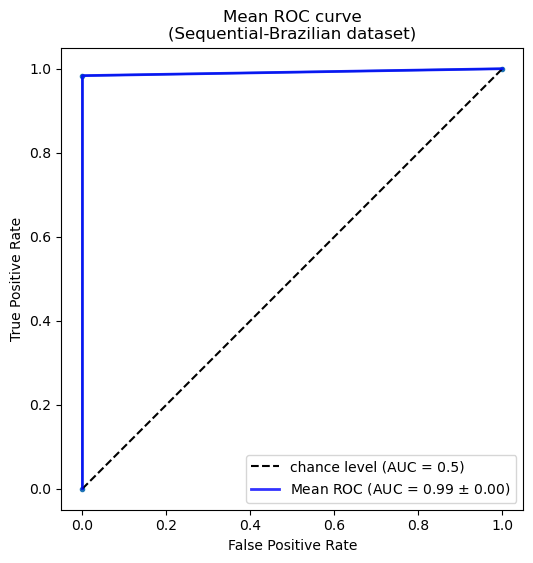

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import auc
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
fpr, tpr, thresholds = roc_curve(y_test, yhat_probs, pos_label=1)
auc_score=roc_auc_score(y_test, yhat_probs)
plt.figure(figsize=(6,6)) 

plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")

mean_tpr = tpr
mean_auc = auc(fpr, mean_tpr)
std_auc = np.std(auc_score)
plt.plot(
    fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"Mean ROC curve\n(Sequential-Brazilian dataset)")
plt.axis("square")
plt.legend(loc="lower right")

plt.show()


In [17]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [18]:
cm = confusion_matrix(y_true=test_LSTM_y, y_pred=yhat_probs)

In [19]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
labels = ['Normal','Fraud']

Confusion matrix, without normalization
[[108262      6]
 [    69   4110]]


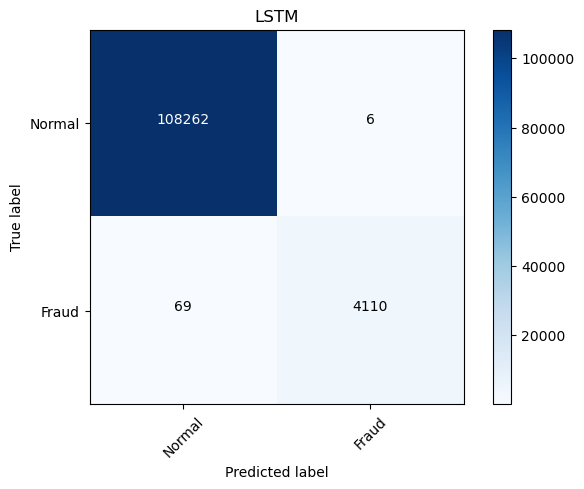

In [20]:
plot_confusion_matrix(cm=cm, classes=labels, title='LSTM')